In [43]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm
from scipy import stats
from scipy.stats import kendalltau
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

data = [
    [1, 8.0, 5.5, 4.3, 17.2, 21.9, 22.8, 23.8, 15.6],
    [2, 9.8, 8.5, 9.9, 14.4, 19.1, 21.1, 21.4, 16.4],
    [3, 11.0, 8.7, 6.1, 10.4, 15.3, 17.2, 17.1, 10.8],
    [4, 5.8, 3.0, 1.6, 13.3, 16.1, 18.5, 19.0, 12.2],
    [5, 12.1, 9.3, 6.1, 16.4, 19.4, 21.2, 21.6, 14.9],
    [6, 8.5, 9.4, 9.8, 16.0, 16.5, 14.4, 13.0, 9.7]
]

columns = ['День', '0.00', '3.00', '6.00', '9.00', '12.00', '15.00', '18.00', '21.00']
df = pd.DataFrame(data, columns=columns)

pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.unicode.east_asian_width', True)

styled_df = df.style \
    .set_properties(**{'border': '1px solid black'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('border', '1px solid black')]
    }]) \
    .format(precision=1, na_rep='-')

display(styled_df)

,День,0.00,3.00,6.00,9.00,12.00,15.00,18.00,21.00
0,1,8.0,5.5,4.3,17.2,21.9,22.8,23.8,15.6
1,2,9.8,8.5,9.9,14.4,19.1,21.1,21.4,16.4
2,3,11.0,8.7,6.1,10.4,15.3,17.2,17.1,10.8
3,4,5.8,3.0,1.6,13.3,16.1,18.5,19.0,12.2
4,5,12.1,9.3,6.1,16.4,19.4,21.2,21.6,14.9
5,6,8.5,9.4,9.8,16.0,16.5,14.4,13.0,9.7


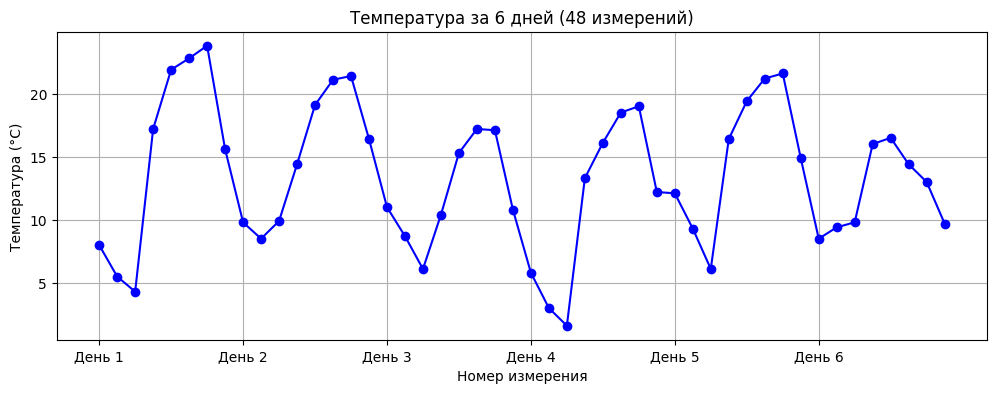

In [32]:
#2.График временного ряда
all_temps = []
for day_data in data:
    all_temps.extend(day_data[1:])

plt.figure(figsize=(12, 4))
plt.plot(all_temps, marker='o', linestyle='-', color='blue')
plt.title('Температура за 6 дней (48 измерений)')
plt.xlabel('Номер измерения')
plt.ylabel('Температура (°C)')
plt.grid(True)
plt.xticks(np.arange(0, 48, 8), labels=[f'День {i}' for i in range(1, 7)])
plt.show()

Описательные статистики:
Среднее: 13.42 °C
Дисперсия: 32.10 °C²
Стандартное отклонение: 5.67 °C
Медиана: 13.85 °C
Первый квартиль (Q1): 9.38 °C
Третий квартиль (Q3): 17.20 °C
Асимметрия: -0.07
Эксцесс: -0.88


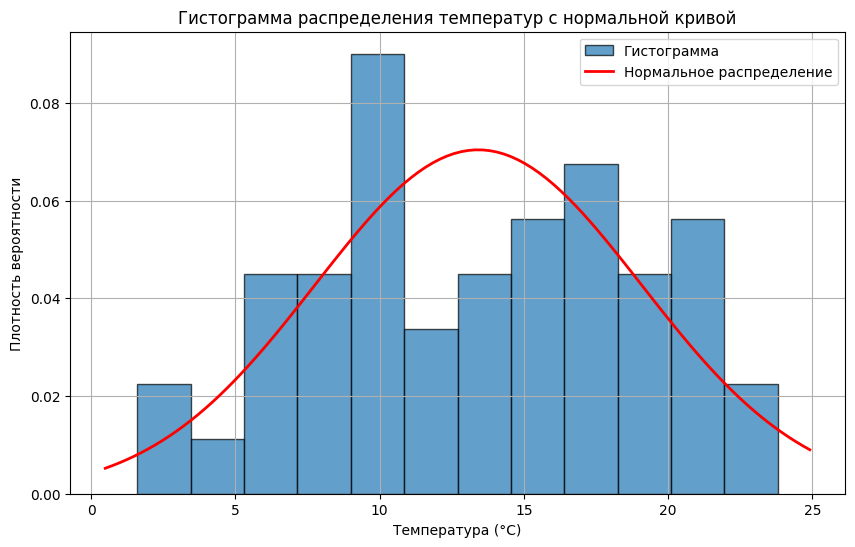

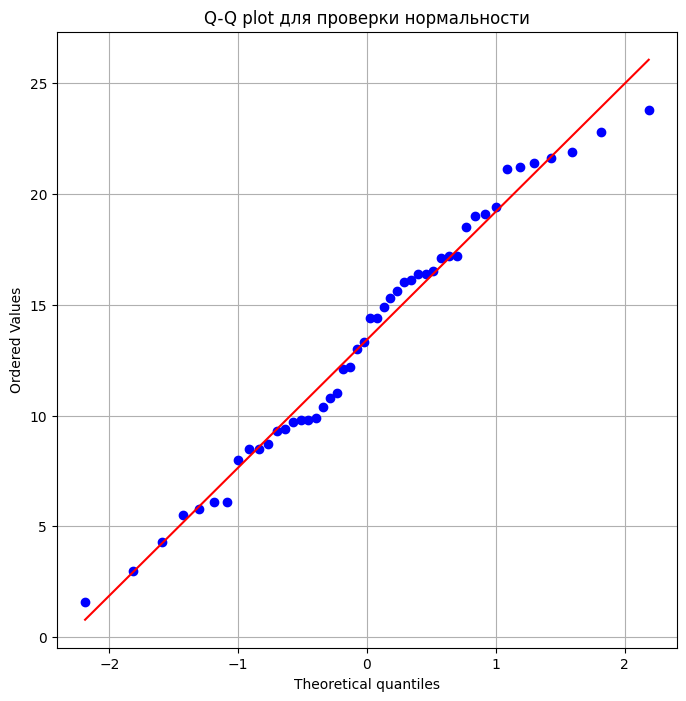


Тест Шапиро-Уилка: p-value = 0.4027
Не отвергаем гипотезу о нормальности (p > 0.05)

Тест Манна-Кендалла на тренд: p-value = 0.9009
Значимый тренд не обнаружен (p > 0.05)


In [49]:
#3. Предварительный статистический анализ
# Описательные статистики
mean = np.mean(all_temps)             
variance = np.var(all_temps, ddof=1)    
std = np.std(all_temps, ddof=1)        
median = np.median(all_temps)           
q1 = np.percentile(all_temps, 25)       
q3 = np.percentile(all_temps, 75)       
skewness = skew(all_temps)              
kurt = kurtosis(all_temps)              

print("Описательные статистики:")
print(f"Среднее: {mean:.2f} °C")
print(f"Дисперсия: {variance:.2f} °C²")
print(f"Стандартное отклонение: {std:.2f} °C")
print(f"Медиана: {median:.2f} °C")
print(f"Первый квартиль (Q1): {q1:.2f} °C")
print(f"Третий квартиль (Q3): {q3:.2f} °C")
print(f"Асимметрия: {skewness:.2f}")
print(f"Эксцесс: {kurt:.2f}")

# Гистограмма с нормальным распределением
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(all_temps, bins=12, density=True, edgecolor='black', alpha=0.7, label='Гистограмма')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r-', linewidth=2, label='Нормальное распределение')

plt.title('Гистограмма распределения температур с нормальной кривой')
plt.xlabel('Температура (°C)')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

# Q-Q plot для проверки нормальности
plt.figure(figsize=(8, 8))
stats.probplot(all_temps, dist="norm", plot=plt)
plt.title('Q-Q plot для проверки нормальности')
plt.grid(True)
plt.show()

# Проверка на нормальность (тест Шапиро-Уилка)
shapiro_test = stats.shapiro(all_temps)
print(f"\nТест Шапиро-Уилка: p-value = {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("Не отвергаем гипотезу о нормальности (p > 0.05)")
else:
    print("Отвергаем гипотезу о нормальности (p ≤ 0.05)")

# Проверка на тренд (тест Манна-Кендалла)
t = np.arange(len(all_temps))  # Создаем временную ось
tau, p_value = kendalltau(t, all_temps)
print(f"\nТест Манна-Кендалла на тренд: p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Значимый тренд не обнаружен (p > 0.05)")
else:
    print("Обнаружен значимый тренд (p ≤ 0.05)")

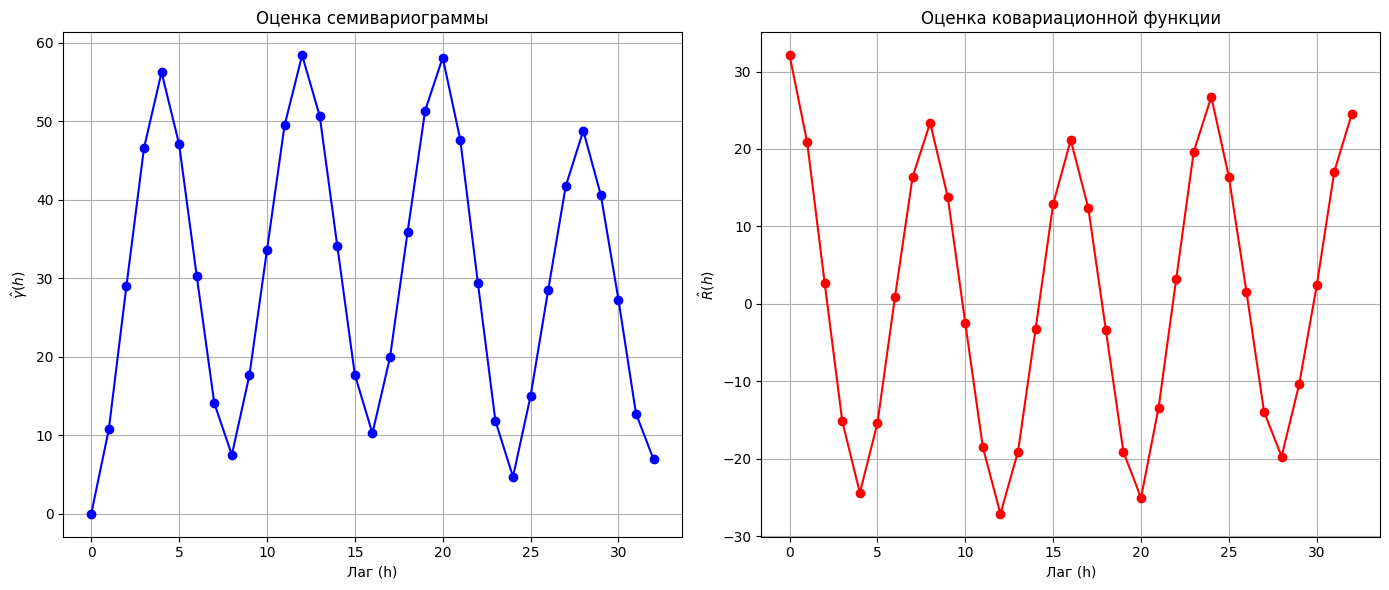

Лаг	Семивариограмма	Ковариация
0	0.0000		32.0986
1	10.7671		20.8720
2	29.0017		2.6417
3	46.5937		-15.1817
4	56.2720		-24.4165
5	47.1043		-15.4218
6	30.3456		0.8876
7	14.1223		16.3614
8	7.5002		23.3837
9	17.6624		13.8174
10	33.6034		-2.4942
11	49.4993		-18.5349
12	58.4368		-27.1225
13	50.7123		-19.0913
14	34.1606		-3.2650
15	17.7302		12.8795
16	10.2581		21.1420
17	19.9187		12.3760
18	35.8845		-3.4035
19	51.3747		-19.1423
20	58.1450		-25.0526
21	47.6752		-13.4230
22	29.4508		3.1577
23	11.8306		19.6401
24	4.7119		26.7180
25	15.0002		16.3852
26	28.4818		1.5552
27	41.7410		-13.9398
28	48.8330		-19.7306
29	40.6082		-10.4031
30	27.3092		2.3689
31	12.7771		17.0756
32	6.9200		24.5693


In [58]:
# 4. Оценки семивариограммы и ковариационной функции для пространственных данных
all_temps = np.array(data)[:, 1:].flatten()
n = len(all_temps)
max_lag = int(2 * n / 3)  # Лаг до 2n/3

def semivariogram_estimate(data, max_lag=None):
    n = len(data)
    if max_lag is None:
        max_lag = n - 1
    gamma = np.zeros(max_lag + 1)
    for h in range(max_lag + 1):
        if h == 0:
            gamma[h] = 0
        else:
            sum_sq = 0
            count = 0
            for s in range(n - h):
                sum_sq += (data[s + h] - data[s])**2
                count += 1
            gamma[h] = sum_sq / (2 * count) if count > 0 else 0
    return gamma

def covariance_estimate(data, max_lag=None):
    n = len(data)
    if max_lag is None:
        max_lag = n - 1
    mu = np.mean(data)
    R = np.zeros(max_lag + 1)
    for h in range(max_lag + 1):
        if h == 0:
            R[h] = np.var(data, ddof=1)
        else:
            sum_prod = 0
            count = 0
            for s in range(n - h):
                sum_prod += (data[s + h] - mu) * (data[s] - mu)
                count += 1
            R[h] = sum_prod / count if count > 0 else 0
    return R

# Вычисляем оценки
gamma = semivariogram_estimate(all_temps, max_lag)
R = covariance_estimate(all_temps, max_lag)

lags = np.arange(max_lag + 1)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(lags, gamma, marker='o', linestyle='-', color='b')
plt.title(r'Оценка семивариограммы')
plt.xlabel('Лаг (h)')
plt.ylabel(r'$\hat{\gamma}(h)$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(lags, R, marker='o', linestyle='-', color='r')
plt.title(r'Оценка ковариационной функции')
plt.xlabel('Лаг (h)')
plt.ylabel(r'$\hat{R}(h)$')
plt.grid(True)

plt.tight_layout()
plt.show()

# Вывод числовых значений для лагов
print("Лаг\tСемивариограмма\tКовариация")
for h in range(33):
    print(f"{h}\t{gamma[h]:.4f}\t\t{R[h]:.4f}")

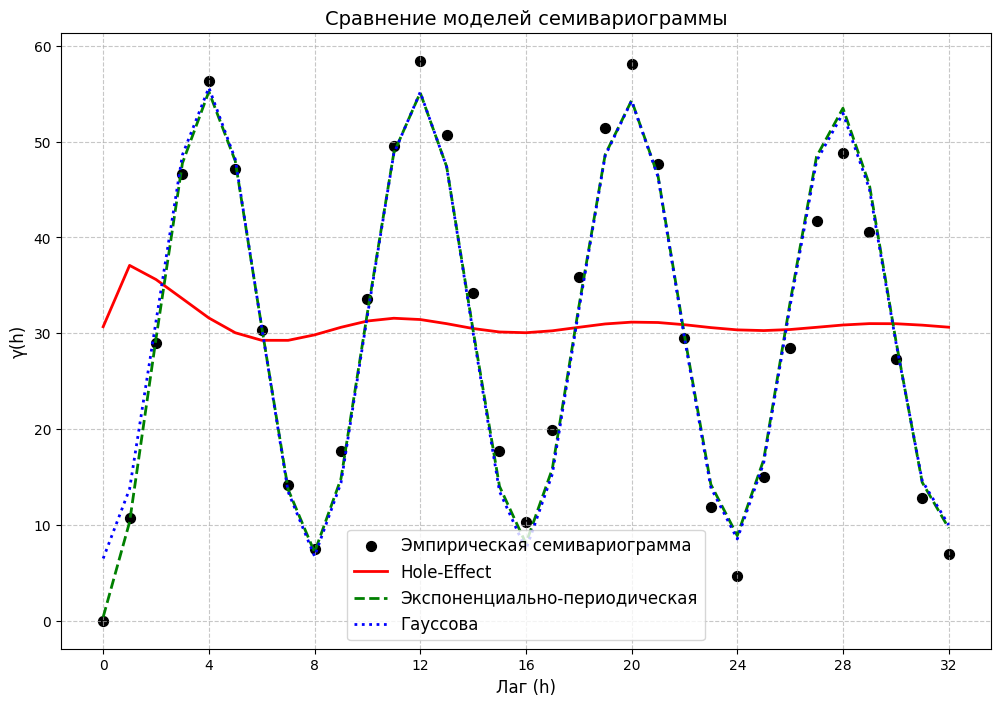

Параметры моделей:

Hole-Effect: C0=37.62, C=-6.94, a=4.54

Экспоненциально-периодическая:
C0=0.38, C1=6.01, a1=1.89
C2=24.99, a2=7.97, a3=236.12

Гауссова: C0=6.49, C=24.59, a=82.98, p=7.97

Сравнение MSE:
Hole-Effect: 279.63
Экспоненциально-периодическая: 8.57
Гауссова: 9.07

Лучшая модель: Экспоненциально-периодическая (MSE = 8.57)


In [94]:
# 5. Сравнение моделей семивариограммы
# Периодическая модель (Hole-Effect)
def hole_effect(h, C0, C, a):
    with np.errstate(divide='ignore', invalid='ignore'):
        return C0 + C * (1 - np.sin(np.pi*h/a) / (np.pi*h/a + 1e-10))  # Защита от деления на 0

# Смешанная экспоненциально-периодическая модель
def exp_periodic(h, C0, C1, a1, C2, a2, a3):
    return C0 + C1*(1 - np.exp(-h/a1)) + C2*(1 - np.cos(2*np.pi*h/a2)*np.exp(-h/a3))

# Гауссова модель с периодичностью
def gaussian_periodic(h, C0, C, a, p):
    return C0 + C*(1 - np.exp(-(h**2)/(a**2)) * np.cos(2*np.pi*h/p))

# Функция для подгонки параметров
def fit_model(model_func, lags, gamma, p0):
    try:
        params, _ = curve_fit(model_func, lags[1:], gamma[1:], p0=p0, maxfev=10000)
        return params
    except RuntimeError:
        return None
        
# Начальные приближения для параметров
p0_hole = [10, 45, 10]          # C0, C, a
p0_exp_per = [10, 30, 5, 20, 10, 5]  # C0, C1, a1, C2, a2, a3
p0_gauss = [10, 45, 5, 10]      # C0, C, a, p

params_hole = fit_model(hole_effect, lags, gamma, p0_hole)
params_exp_per = fit_model(exp_periodic, lags, gamma, p0_exp_per)
params_gauss = fit_model(gaussian_periodic, lags, gamma, p0_gauss)

plt.figure(figsize=(12, 8))
plt.scatter(lags, gamma, color='black', s=50, label='Эмпирическая семивариограмма')

if params_hole is not None:
    fit_hole = hole_effect(lags, *params_hole)
    plt.plot(lags, fit_hole, 'r-', linewidth=2, label=f'Hole-Effect')

if params_exp_per is not None:
    fit_exp_per = exp_periodic(lags, *params_exp_per)
    plt.plot(lags, fit_exp_per, 'g--', linewidth=2, label='Экспоненциально-периодическая')

if params_gauss is not None:
    fit_gauss = gaussian_periodic(lags, *params_gauss)
    plt.plot(lags, fit_gauss, 'b:', linewidth=2, label=f'Гауссова')

plt.title('Сравнение моделей семивариограммы', fontsize=14)
plt.xlabel('Лаг (h)', fontsize=12)
plt.ylabel('γ(h)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, max_lag+1, 4))
plt.show()

# Вывод параметров моделей
print("Параметры моделей:")
if params_hole is not None:
    print(f"\nHole-Effect: C0={params_hole[0]:.2f}, C={params_hole[1]:.2f}, a={params_hole[2]:.2f}")
if params_exp_per is not None:
    print(f"\nЭкспоненциально-периодическая:")
    print(f"C0={params_exp_per[0]:.2f}, C1={params_exp_per[1]:.2f}, a1={params_exp_per[2]:.2f}")
    print(f"C2={params_exp_per[3]:.2f}, a2={params_exp_per[4]:.2f}, a3={params_exp_per[5]:.2f}")
if params_gauss is not None:
    print(f"\nГауссова: C0={params_gauss[0]:.2f}, C={params_gauss[1]:.2f}, a={params_gauss[2]:.2f}, p={params_gauss[3]:.2f}")

# Сравнение по MSE
def calculate_mse(model_func, params, lags, gamma):
    if params is None:
        return np.inf
    pred = model_func(lags[1:], *params)
    return np.mean((pred - gamma[1:])**2)

mse_hole = calculate_mse(hole_effect, params_hole, lags, gamma)
mse_exp_per = calculate_mse(exp_periodic, params_exp_per, lags, gamma)
mse_gauss = calculate_mse(gaussian_periodic, params_gauss, lags, gamma)

print("\nСравнение MSE:")
print(f"Hole-Effect: {mse_hole:.2f}")
print(f"Экспоненциально-периодическая: {mse_exp_per:.2f}")
print(f"Гауссова: {mse_gauss:.2f}")

best_model = np.argmin([mse_hole, mse_exp_per, mse_gauss])
models = ["Hole-Effect", "Экспоненциально-периодическая", "Гауссова"]
print(f"\nЛучшая модель: {models[best_model]} (MSE = {min(mse_hole, mse_exp_per, mse_gauss):.2f})")

,День,0.00,3.00,6.00,9.00,12.00,15.00,18.00,21.00
0,1,8.0,5.5,4.3,17.2,21.9,22.8,23.8,15.6
1,2,9.8,8.5,9.9,14.4,19.1,21.1,21.4,16.4
2,3,11.0,8.7,6.1,10.4,15.3,17.2,17.1,10.8
3,4,5.8,3.0,1.6,13.3,16.1,18.5,19.0,12.2
4,5,12.1,9.3,6.1,16.4,19.4,21.2,21.6,14.9
5,6,8.5,9.4,9.8,16.0,16.5,14.4,13.0,9.7


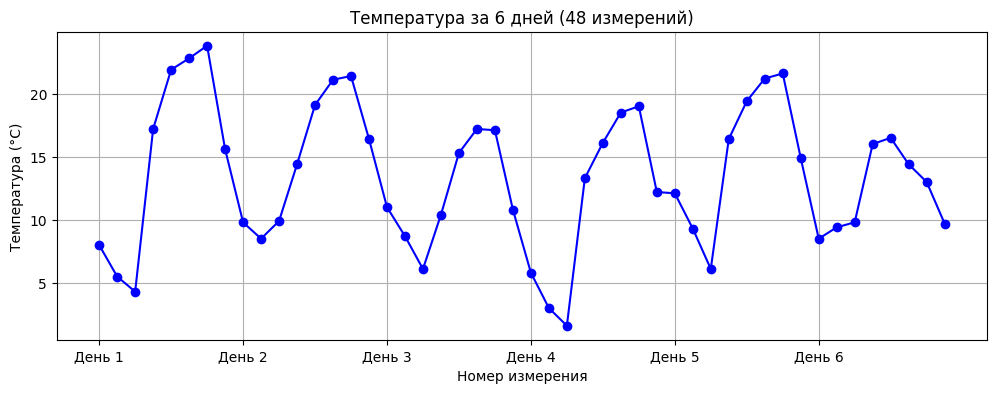

Описательные статистики:
Среднее: 13.42 °C
Дисперсия: 32.10 °C²
Стандартное отклонение: 5.67 °C
Медиана: 13.85 °C
Первый квартиль (Q1): 9.38 °C
Третий квартиль (Q3): 17.20 °C
Асимметрия: -0.07
Эксцесс: -0.88


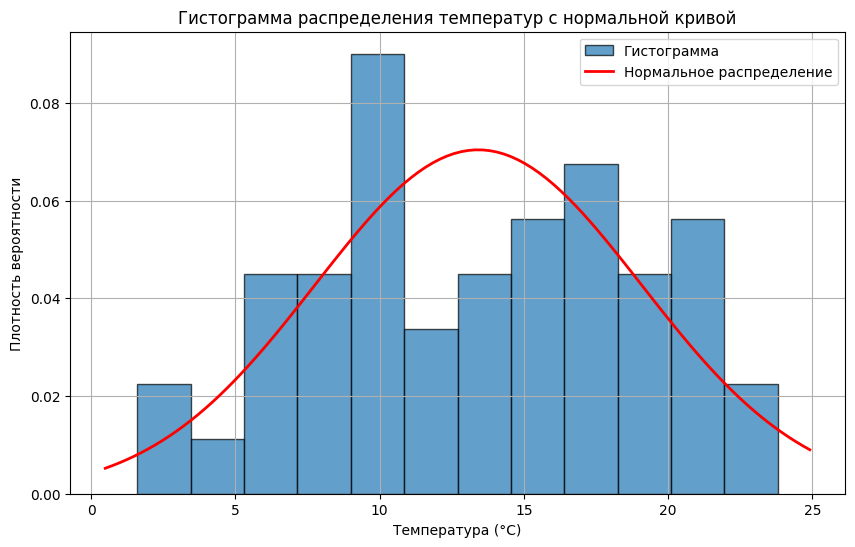

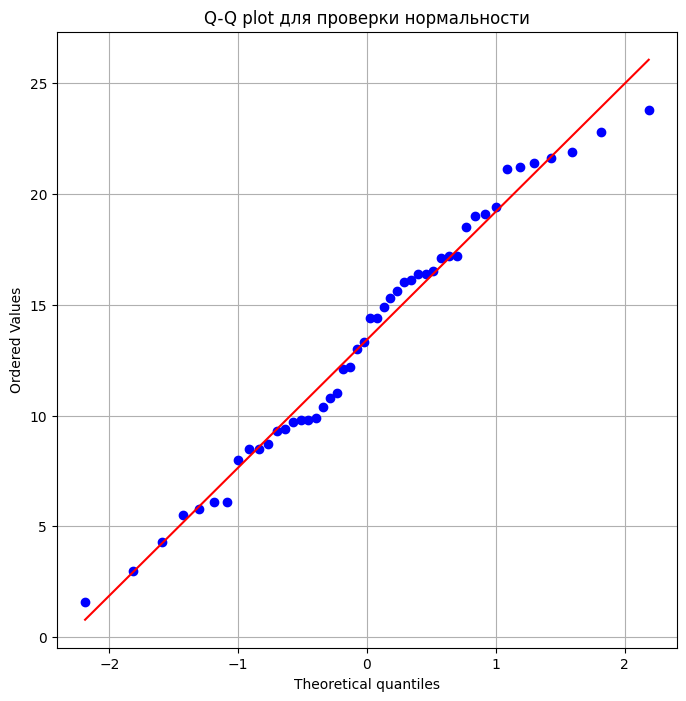


Тест Шапиро-Уилка: p-value = 0.4027
Не отвергаем гипотезу о нормальности (p > 0.05)

Тест Манна-Кендалла на тренд: p-value = 0.9009
Значимый тренд не обнаружен (p > 0.05)


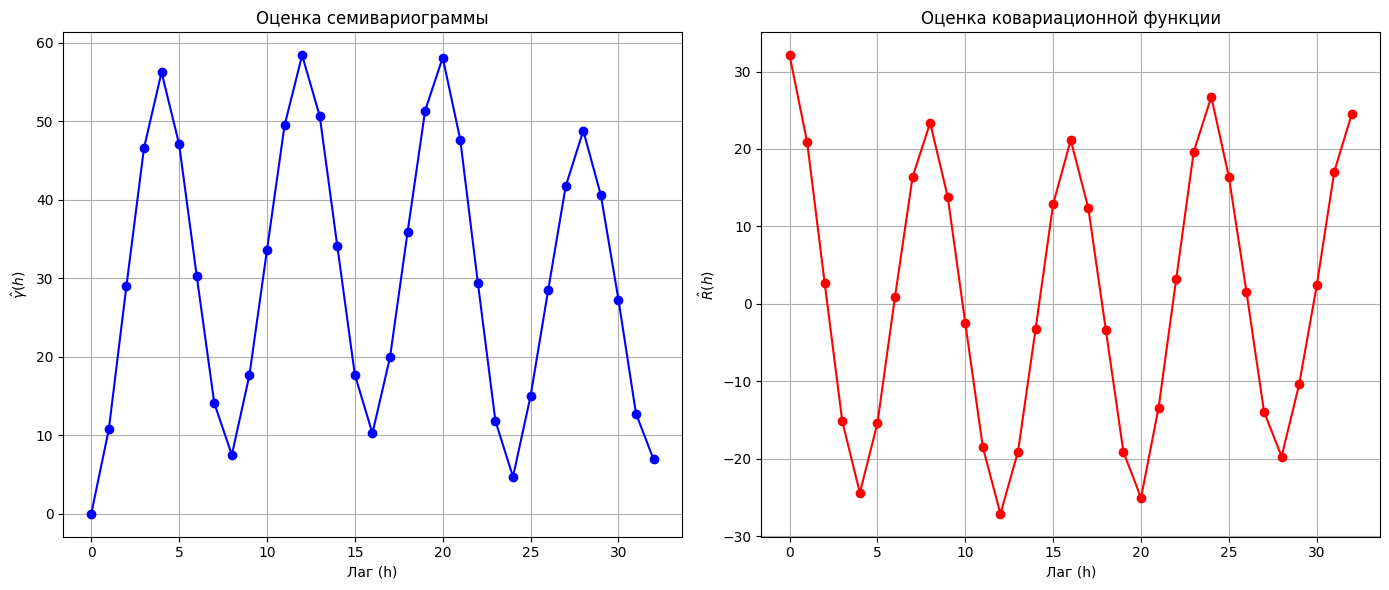

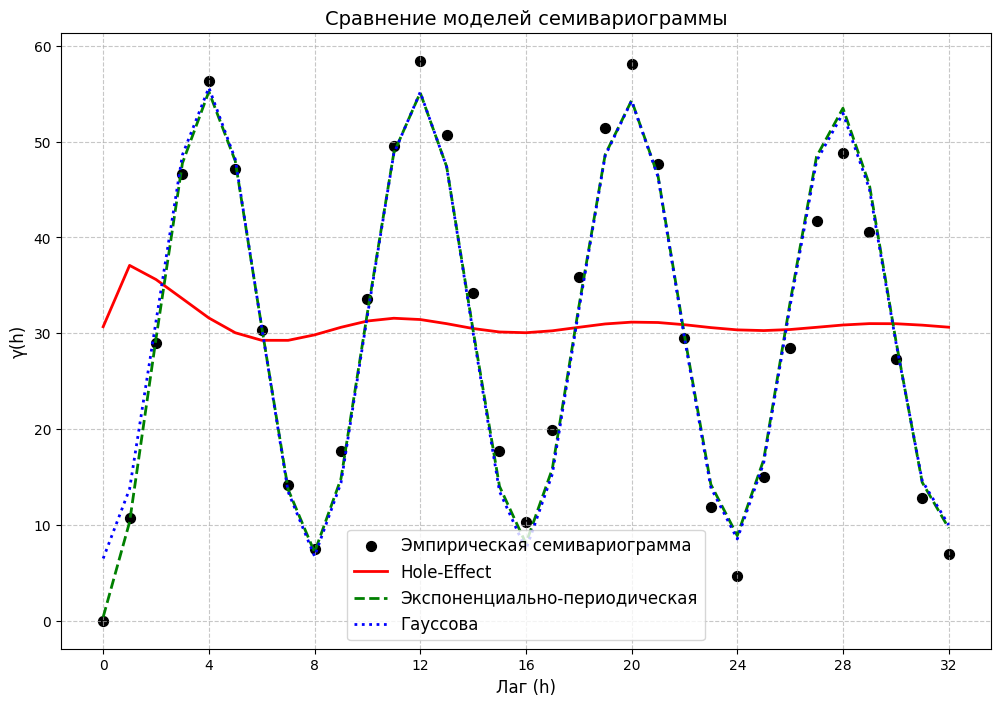

Параметры моделей:

Hole-Effect: C0=37.62, C=-6.94, a=4.54

Экспоненциально-периодическая:
C0=0.38, C1=6.01, a1=1.89
C2=24.99, a2=7.97, a3=236.12

Гауссова: C0=6.49, C=24.59, a=82.98, p=7.97

Сравнение MSE:
Hole-Effect: 279.63
Экспоненциально-периодическая: 8.57
Гауссова: 9.07

Лучшая модель: Экспоненциально-периодическая (MSE = 8.57)


In [98]:
#итоговый код
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm
from scipy import stats
from scipy.stats import kendalltau
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

data = [
    [1, 8.0, 5.5, 4.3, 17.2, 21.9, 22.8, 23.8, 15.6],
    [2, 9.8, 8.5, 9.9, 14.4, 19.1, 21.1, 21.4, 16.4],
    [3, 11.0, 8.7, 6.1, 10.4, 15.3, 17.2, 17.1, 10.8],
    [4, 5.8, 3.0, 1.6, 13.3, 16.1, 18.5, 19.0, 12.2],
    [5, 12.1, 9.3, 6.1, 16.4, 19.4, 21.2, 21.6, 14.9],
    [6, 8.5, 9.4, 9.8, 16.0, 16.5, 14.4, 13.0, 9.7]
]

columns = ['День', '0.00', '3.00', '6.00', '9.00', '12.00', '15.00', '18.00', '21.00']
df = pd.DataFrame(data, columns=columns)

pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.unicode.east_asian_width', True)

styled_df = df.style \
    .set_properties(**{'border': '1px solid black'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('border', '1px solid black')]
    }]) \
    .format(precision=1, na_rep='-')

display(styled_df)

# 2. График временного ряда
all_temps = []
for day_data in data:
    all_temps.extend(day_data[1:])

plt.figure(figsize=(12, 4))
plt.plot(all_temps, marker='o', linestyle='-', color='blue')
plt.title('Температура за 6 дней (48 измерений)')
plt.xlabel('Номер измерения')
plt.ylabel('Температура (°C)')
plt.grid(True)
plt.xticks(np.arange(0, 48, 8), labels=[f'День {i}' for i in range(1, 7)])
plt.show()

# 3. Предварительный статистический анализ
# Описательные статистики
mean = np.mean(all_temps)             
variance = np.var(all_temps, ddof=1)    
std = np.std(all_temps, ddof=1)        
median = np.median(all_temps)           
q1 = np.percentile(all_temps, 25)       
q3 = np.percentile(all_temps, 75)       
skewness = skew(all_temps)              
kurt = kurtosis(all_temps)              

print("Описательные статистики:")
print(f"Среднее: {mean:.2f} °C")
print(f"Дисперсия: {variance:.2f} °C²")
print(f"Стандартное отклонение: {std:.2f} °C")
print(f"Медиана: {median:.2f} °C")
print(f"Первый квартиль (Q1): {q1:.2f} °C")
print(f"Третий квартиль (Q3): {q3:.2f} °C")
print(f"Асимметрия: {skewness:.2f}")
print(f"Эксцесс: {kurt:.2f}")

# Гистограмма с нормальным распределением
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(all_temps, bins=12, density=True, edgecolor='black', alpha=0.7, label='Гистограмма')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r-', linewidth=2, label='Нормальное распределение')

plt.title('Гистограмма распределения температур с нормальной кривой')
plt.xlabel('Температура (°C)')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

# Q-Q plot для проверки нормальности
plt.figure(figsize=(8, 8))
stats.probplot(all_temps, dist="norm", plot=plt)
plt.title('Q-Q plot для проверки нормальности')
plt.grid(True)
plt.show()

# Проверка на нормальность (тест Шапиро-Уилка)
shapiro_test = stats.shapiro(all_temps)
print(f"\nТест Шапиро-Уилка: p-value = {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("Не отвергаем гипотезу о нормальности (p > 0.05)")
else:
    print("Отвергаем гипотезу о нормальности (p ≤ 0.05)")

# Проверка на тренд (тест Манна-Кендалла)
t = np.arange(len(all_temps))  # Создаем временную ось
tau, p_value = kendalltau(t, all_temps)
print(f"\nТест Манна-Кендалла на тренд: p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Значимый тренд не обнаружен (p > 0.05)")
else:
    print("Обнаружен значимый тренд (p ≤ 0.05)")

# 4. Оценки семивариограммы и ковариационной функции для пространственных данных
all_temps = np.array(data)[:, 1:].flatten()
n = len(all_temps)
max_lag = int(2 * n / 3)  # Лаг до 2n/3

def semivariogram_estimate(data, max_lag=None):
    n = len(data)
    if max_lag is None:
        max_lag = n - 1
    gamma = np.zeros(max_lag + 1)
    for h in range(max_lag + 1):
        if h == 0:
            gamma[h] = 0
        else:
            sum_sq = 0
            count = 0
            for s in range(n - h):
                sum_sq += (data[s + h] - data[s])**2
                count += 1
            gamma[h] = sum_sq / (2 * count) if count > 0 else 0
    return gamma

def covariance_estimate(data, max_lag=None):
    n = len(data)
    if max_lag is None:
        max_lag = n - 1
    mu = np.mean(data)
    R = np.zeros(max_lag + 1)
    for h in range(max_lag + 1):
        if h == 0:
            R[h] = np.var(data, ddof=1)
        else:
            sum_prod = 0
            count = 0
            for s in range(n - h):
                sum_prod += (data[s + h] - mu) * (data[s] - mu)
                count += 1
            R[h] = sum_prod / count if count > 0 else 0
    return R

# Вычисляем оценки
gamma = semivariogram_estimate(all_temps, max_lag)
R = covariance_estimate(all_temps, max_lag)

lags = np.arange(max_lag + 1)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(lags, gamma, marker='o', linestyle='-', color='b')
plt.title(r'Оценка семивариограммы')
plt.xlabel('Лаг (h)')
plt.ylabel(r'$\hat{\gamma}(h)$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(lags, R, marker='o', linestyle='-', color='r')
plt.title(r'Оценка ковариационной функции')
plt.xlabel('Лаг (h)')
plt.ylabel(r'$\hat{R}(h)$')
plt.grid(True)

plt.tight_layout()
plt.show()

# 5. Сравнение моделей семивариограммы
# Периодическая модель (Hole-Effect)
def hole_effect(h, C0, C, a):
    with np.errstate(divide='ignore', invalid='ignore'):
        return C0 + C * (1 - np.sin(np.pi*h/a) / (np.pi*h/a + 1e-10))  # Защита от деления на 0

# Смешанная экспоненциально-периодическая модель
def exp_periodic(h, C0, C1, a1, C2, a2, a3):
    return C0 + C1*(1 - np.exp(-h/a1)) + C2*(1 - np.cos(2*np.pi*h/a2)*np.exp(-h/a3))

# Гауссова модель с периодичностью
def gaussian_periodic(h, C0, C, a, p):
    return C0 + C*(1 - np.exp(-(h**2)/(a**2)) * np.cos(2*np.pi*h/p))

# Функция для подгонки параметров
def fit_model(model_func, lags, gamma, p0):
    try:
        params, _ = curve_fit(model_func, lags[1:], gamma[1:], p0=p0, maxfev=10000)
        return params
    except RuntimeError:
        return None
        
# Начальные приближения для параметров
p0_hole = [10, 45, 10]          # C0, C, a
p0_exp_per = [10, 30, 5, 20, 10, 5]  # C0, C1, a1, C2, a2, a3
p0_gauss = [10, 45, 5, 10]      # C0, C, a, p

params_hole = fit_model(hole_effect, lags, gamma, p0_hole)
params_exp_per = fit_model(exp_periodic, lags, gamma, p0_exp_per)
params_gauss = fit_model(gaussian_periodic, lags, gamma, p0_gauss)

plt.figure(figsize=(12, 8))
plt.scatter(lags, gamma, color='black', s=50, label='Эмпирическая семивариограмма')

if params_hole is not None:
    fit_hole = hole_effect(lags, *params_hole)
    plt.plot(lags, fit_hole, 'r-', linewidth=2, label=f'Hole-Effect')

if params_exp_per is not None:
    fit_exp_per = exp_periodic(lags, *params_exp_per)
    plt.plot(lags, fit_exp_per, 'g--', linewidth=2, label='Экспоненциально-периодическая')

if params_gauss is not None:
    fit_gauss = gaussian_periodic(lags, *params_gauss)
    plt.plot(lags, fit_gauss, 'b:', linewidth=2, label=f'Гауссова')

plt.title('Сравнение моделей семивариограммы', fontsize=14)
plt.xlabel('Лаг (h)', fontsize=12)
plt.ylabel('γ(h)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, max_lag+1, 4))
plt.show()

# Вывод параметров моделей
print("Параметры моделей:")
if params_hole is not None:
    print(f"\nHole-Effect: C0={params_hole[0]:.2f}, C={params_hole[1]:.2f}, a={params_hole[2]:.2f}")
if params_exp_per is not None:
    print(f"\nЭкспоненциально-периодическая:")
    print(f"C0={params_exp_per[0]:.2f}, C1={params_exp_per[1]:.2f}, a1={params_exp_per[2]:.2f}")
    print(f"C2={params_exp_per[3]:.2f}, a2={params_exp_per[4]:.2f}, a3={params_exp_per[5]:.2f}")
if params_gauss is not None:
    print(f"\nГауссова: C0={params_gauss[0]:.2f}, C={params_gauss[1]:.2f}, a={params_gauss[2]:.2f}, p={params_gauss[3]:.2f}")

# Сравнение по MSE
def calculate_mse(model_func, params, lags, gamma):
    if params is None:
        return np.inf
    pred = model_func(lags[1:], *params)
    return np.mean((pred - gamma[1:])**2)

mse_hole = calculate_mse(hole_effect, params_hole, lags, gamma)
mse_exp_per = calculate_mse(exp_periodic, params_exp_per, lags, gamma)
mse_gauss = calculate_mse(gaussian_periodic, params_gauss, lags, gamma)

print("\nСравнение MSE:")
print(f"Hole-Effect: {mse_hole:.2f}")
print(f"Экспоненциально-периодическая: {mse_exp_per:.2f}")
print(f"Гауссова: {mse_gauss:.2f}")

best_model = np.argmin([mse_hole, mse_exp_per, mse_gauss])
models = ["Hole-Effect", "Экспоненциально-периодическая", "Гауссова"]
print(f"\nЛучшая модель: {models[best_model]} (MSE = {min(mse_hole, mse_exp_per, mse_gauss):.2f})")